In [1]:
import pandas as pd
import numpy as np

data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [4]:
x=df.drop("buys_computer",axis=1)
y=df["buys_computer"]

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [7]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

model.score(x_train,y_train)

1.0

In [26]:

depth_of_tree=model.get_depth()
print(depth_of_tree)

4


In [13]:

y_preds=model.predict(x_test.values)
y_preds

C:\Users\deven\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 1, 0])

In [14]:
from sklearn.metrics import confusion_matrix,classification_report

decession_matrix=confusion_matrix(y_test,y_preds)
decession_report = classification_report(y_test,y_preds)

In [15]:
print(decession_matrix)

[[1 0]
 [1 2]]


In [16]:
print(decession_report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [19]:


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = { "accuracy": round(accuracy,2),
                   "precision" : round(precision,2),
                  "recall": round(recall,2),
                  "f1":round(f1,2)}
    print(f"Acc       : {accuracy*100:.2f}%")
    print(f"Precision : {precision*100:.2f}%")
    print(f"Recall    : {recall*100:.2f}%")
    print(f"F1_score  : {f1*100:.2f}%")
    return metric_dict

In [27]:
metrics = evaluate_preds(y_test,y_preds)
metrics

Acc       : 75.00%
Precision : 100.00%
Recall    : 66.67%
F1_score  : 80.00%


{'accuracy': 0.75, 'precision': 1.0, 'recall': 0.67, 'f1': 0.8}

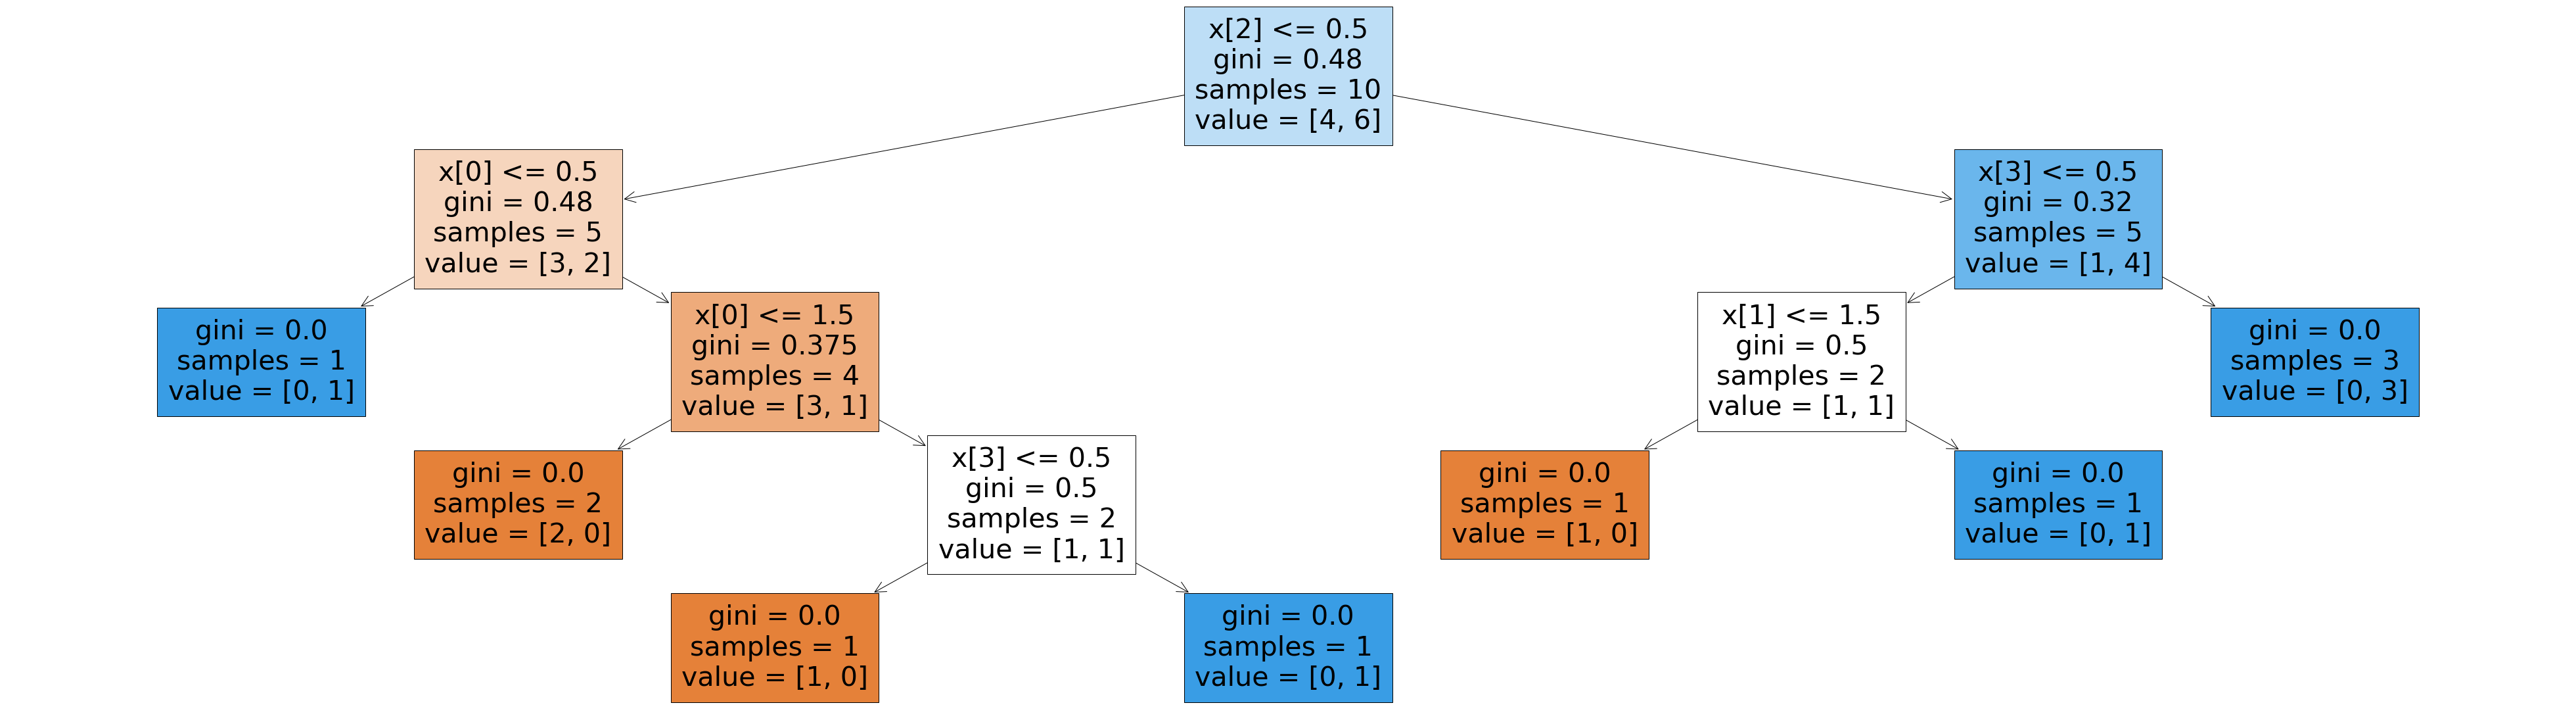

In [25]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(70, 20))
from sklearn.tree import plot_tree 
plot_tree(model, filled=True)
plt.show()

In [41]:
import pandas as pd
import numpy as np
df=pd.read_csv("MAlayalam_char_glcm_features.csv")
df.head()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label,fname
0,17.216435,21.119725,20.889887,21.543330,0.491436,0.390284,0.389736,0.378055,0.932486,0.917179,...,0.804286,0.788199,0.790551,0.786816,0.896820,0.887806,0.889129,0.887027,3333,1.png
1,12.143708,15.748918,14.495192,15.859307,0.504656,0.375442,0.414030,0.371065,0.952378,0.938240,...,0.858505,0.843167,0.849379,0.842788,0.926556,0.918241,0.921618,0.918035,3333,10.png
2,17.216435,21.119725,20.889887,21.543330,0.491436,0.390284,0.389736,0.378055,0.932486,0.917179,...,0.804286,0.788199,0.790551,0.786816,0.896820,0.887806,0.889129,0.887027,3333,100.png
3,12.019049,15.824242,14.639564,16.002597,0.536540,0.396562,0.428353,0.388649,0.937824,0.921008,...,0.841781,0.823179,0.829753,0.822738,0.917486,0.907292,0.910908,0.907049,3333,11.png
4,13.591560,16.543238,12.819549,14.969519,0.398153,0.288259,0.437464,0.355965,0.946701,0.935126,...,0.860980,0.848183,0.862887,0.853592,0.927890,0.920969,0.928917,0.923900,3333,12.png


In [42]:
df.drop("fname",axis=1,inplace=True)

In [43]:
from sklearn.model_selection import train_test_split
x = df.drop("label",axis=1)
y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
model_basic = DecisionTreeClassifier()
model_basic.fit(x_train,y_train)

print(f"The score on training data :{ model_basic.score(x_train,y_train)}")

print(f"The score on training data :{ model_basic.score(x_test,y_test)}")

The score on training data :0.8227180527383368
The score on training data :0.5997566909975669


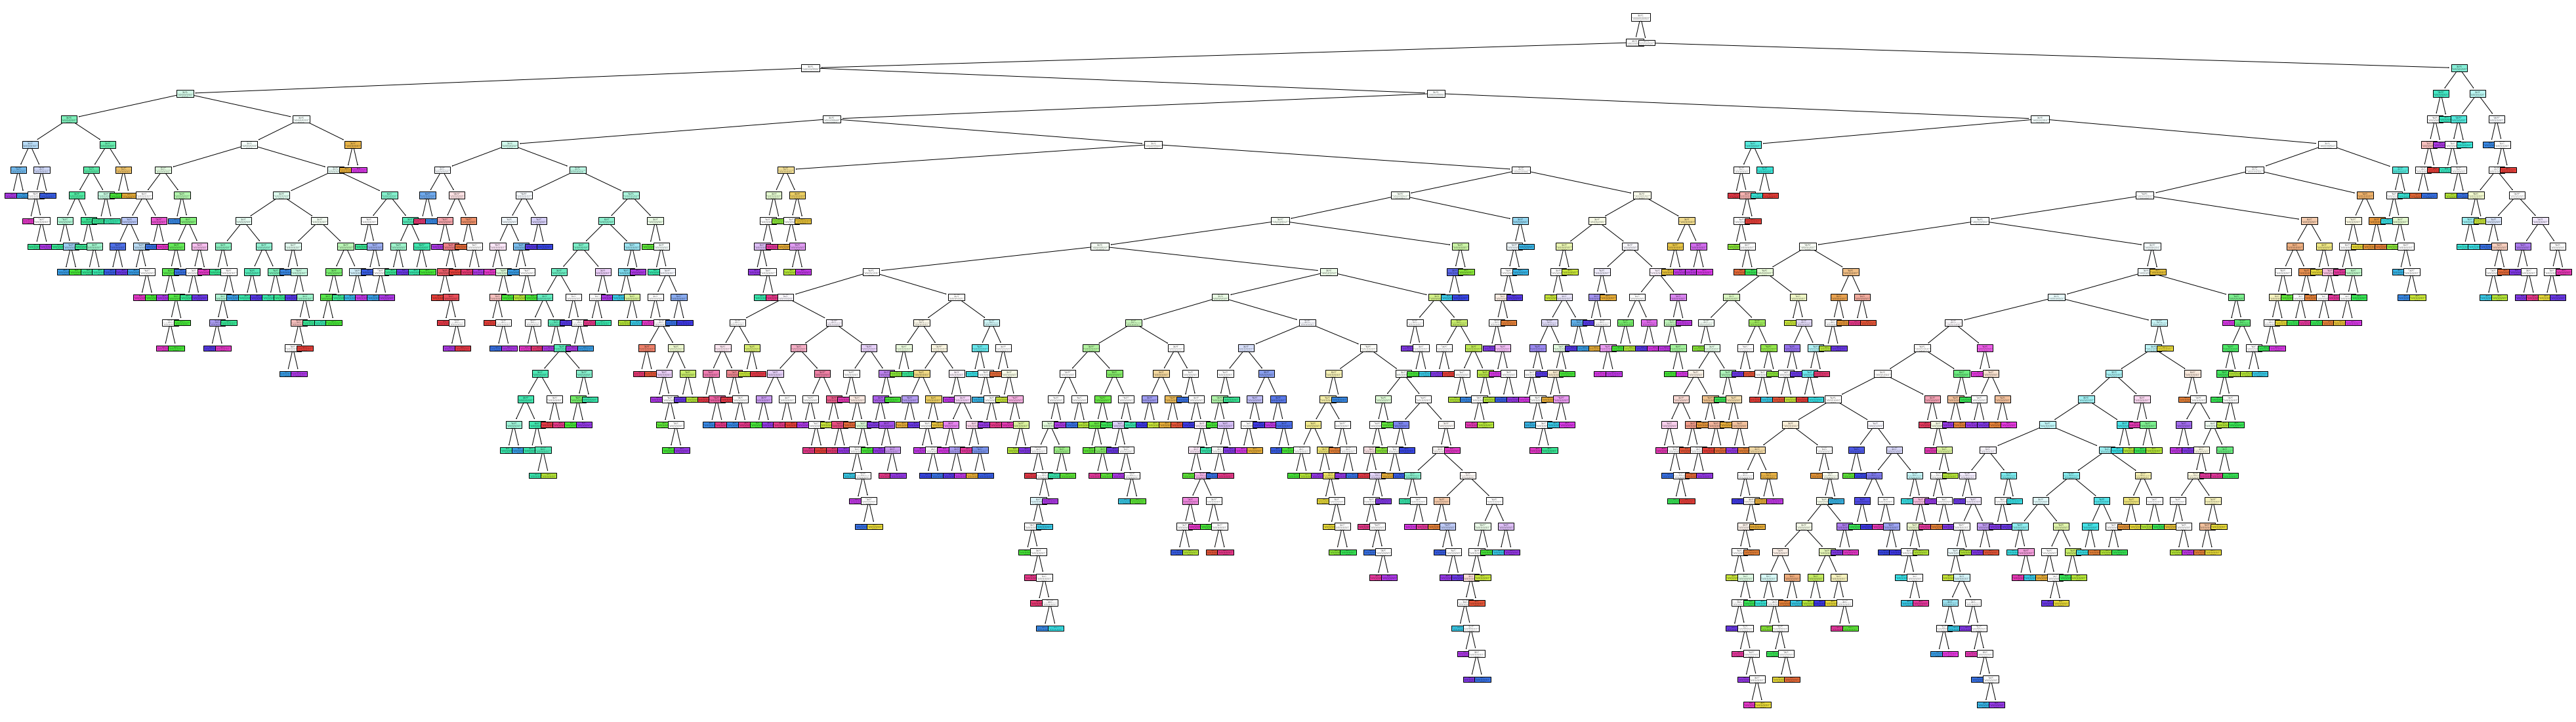

In [44]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(70, 20))
from sklearn.tree import plot_tree 
plot_tree(model_basic, filled=True)
plt.show()